# Dataset: Trackster neighborhood approach

Get tracksters from the cone neighbourhood.

Neighbourhood:
- get links from ticlNtuplizer/graph
    - linked_inners: nodes linked to the given tracksters within its cone

Use the features from MLP approach per trackster.
Look at the graph of tracksters, extract information from the neighborhood and perform link prediction.
- convert the tracksters into some latent space and predict a link between them
- use edgeconv or sageconf to add information from the neighbourhood


In [55]:
import uproot
import numpy as np
import awkward as ak

from reco.distance import euclidian_distance, get_z_map
from reco.datasetPU import TracksterGraph, get_event_graph
from reco.matching import find_good_pairs
from reco.plotting import plot_tracksters, plot_graph_3D
from reco.graphs import create_graph
from reco.event import get_bary_data, get_event_data

import matplotlib.pyplot as plt


ds_name = "MultiParticle"

data_root = "data"
raw_dir = f"/Users/ecuba/data/{ds_name}"

file_name = f"{raw_dir}/new_ntuples_15163313_1.root"

In [56]:
cluster_data, trackster_data, simtrackster_data, assoc_data = get_event_data(file_name)

In [61]:
eid = 0
dataset = get_event_graph(
    cluster_data,
    trackster_data,
    simtrackster_data,
    assoc_data,
    eid,
    radius=10,
)
print("High-energy tracksters:", len(dataset))

ds = dataset[0]

node_index = ds.node_index
pos_index = ds.y >= 0.7
neg_index = ds.y < 0.7

positive = node_index[pos_index].tolist()
negative = node_index[neg_index].tolist()

print("Trackster 0:", len(positive), "/", len(node_index))

High-energy tracksters: 9
Trackster 0: 12 / 16


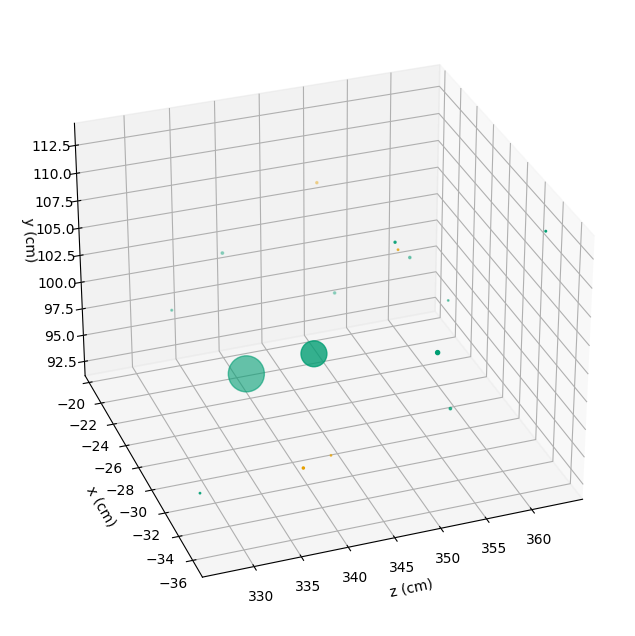

In [62]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111, projection='3d')

bary = get_bary_data(trackster_data, eid)
ax1.scatter(bary[:,2][positive], bary[:,0][positive], bary[:,1][positive], s=trackster_data["raw_energy"][eid][positive], c="#009E73")
ax1.scatter(bary[:,2][negative], bary[:,0][negative], bary[:,1][negative], s=trackster_data["raw_energy"][eid][negative], c="#E69F00")

ax1.set_xlabel("z (cm)")
ax1.set_ylabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.view_init(elev=30, azim=-110)

# plt.legend()
#fig.savefig('export/photon-PU-pairwise-edges.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

## Dataset

In [63]:
ds = TracksterGraph(
    ds_name,
    data_root,
    raw_dir,
    N_FILES=1,
    radius=10,
)
ds

Processing...
/Users/ecuba/data/MultiParticle/new_ntuples_15163313_4.root
Done!


TracksterGraph(graphs=1074, nodes=18109, radius=10, score_threshold=0.2)

Tracksters: 122 Edges: 788


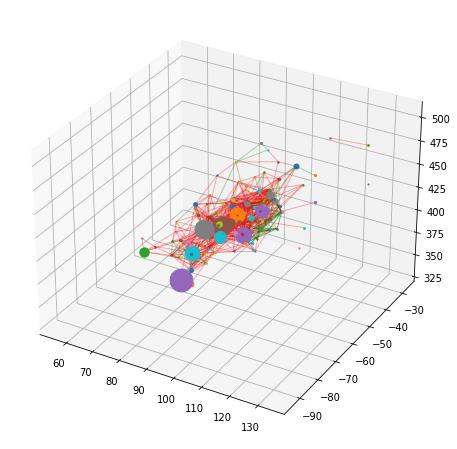

In [42]:
sample = ds[6]

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111, projection='3d')

nx = np.array(sample.x)
print("Tracksters:", nx.shape[0], "Edges:", len(sample.edge_index.T))

for tx in nx:
    ax1.scatter(tx[0], tx[1], tx[2], s=tx[3])

def plot_edge(ax, nx, edge, color):
    a, b = edge

    x = (nx[a, 0], nx[b, 0])
    y = (nx[a, 1], nx[b, 1])
    z = (nx[a, 2], nx[b, 2])
    ax.plot(x, y, z, c=color, linewidth=1, alpha=0.3)

for edge, label in zip(sample.edge_index.T, sample.y):
    plot_edge(ax1, nx, edge, "green" if label == 1 else "red")

plt.show()